✅ Dataset Loaded Successfully!
Shape: (1025, 12)
Training set: (820, 11), Testing set: (205, 11)

🔹 Tuning Random Forest using GridSearchCV...
✅ Best Params for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000, AUC=1.0000

🔹 Tuning Logistic Regression using GridSearchCV...
✅ Best Params for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Accuracy=0.8293, F1=0.8458, Precision=0.7869, Recall=0.9143, AUC=0.9268

🔹 Tuning SVM using GridSearchCV...
✅ Best Params for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy=0.9756, F1=0.9763, Precision=0.9717, Recall=0.9810, AUC=0.9983

🔹 Tuning Decision Tree using GridSearchCV...
✅ Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000, AUC=1.0000

📌 Final Model Comparison After Tuning:


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
3,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,SVM,0.975610,0.971698,0.980952,0.976303,0.998286
1,Logistic Regression,0.829268,0.786885,0.914286,0.845815,0.926762


C:\Users\Linda\AppData\Local\Temp\ipykernel_24776\427624535.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=results_df, palette="viridis")


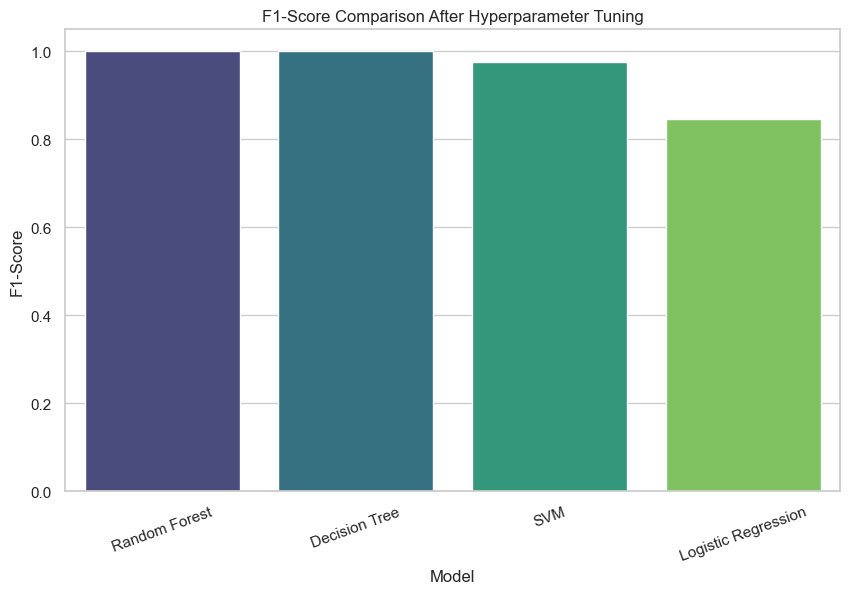


✅ Best Tuned Model 'Random Forest' saved as 'best_model_tuned.pkl'


In [1]:
# =====================================
# STEP 1: IMPORT LIBRARIES
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# =====================================
# STEP 2: LOAD THE DATASET
# =====================================
df = pd.read_csv("heart_selected_features.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)

# Fix target column: convert to binary integers if needed
if 'target' in df.columns:
    df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0).astype(int)

# Split features & target
X = df.drop("target", axis=1)
y = df["target"]

# Split train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

# =====================================
# STEP 3: DEFINE PARAMETER GRIDS FOR MODELS
# =====================================
# Random Forest
rf_params = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Logistic Regression
log_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"]
}

# SVM
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

# Decision Tree
dt_params = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# =====================================
# STEP 4: SETUP MODELS
# =====================================
models = {
    "Random Forest": (RandomForestClassifier(random_state=42), rf_params),
    "Logistic Regression": (LogisticRegression(max_iter=500), log_params),
    "SVM": (SVC(probability=True), svm_params),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), dt_params)
}

# =====================================
# STEP 5: GRIDSEARCHCV TUNING
# =====================================
best_models = {}
results = []

for model_name, (model, params) in models.items():
    print(f"\n🔹 Tuning {model_name} using GridSearchCV...")
    
    grid = GridSearchCV(model, params, cv=5, scoring="f1", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    best_models[model_name] = best_model
    
    # Predictions & evaluation
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append([model_name, acc, prec, rec, f1, auc])
    print(f"✅ Best Params for {model_name}: {grid.best_params_}")
    print(f"Accuracy={acc:.4f}, F1={f1:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, AUC={auc:.4f}")

# =====================================
# STEP 6: RESULTS SUMMARY
# =====================================
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
results_df = results_df.sort_values(by="F1-Score", ascending=False)
print("\n📌 Final Model Comparison After Tuning:")
display(results_df)

# =====================================
# STEP 7: VISUALIZE RESULTS
# =====================================
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1-Score", data=results_df, palette="viridis")
plt.title("F1-Score Comparison After Hyperparameter Tuning")
plt.ylabel("F1-Score")
plt.xticks(rotation=20)
plt.show()

# =====================================
# STEP 8: SAVE THE BEST MODEL
# =====================================
from joblib import dump

best_model_name = results_df.iloc[0]["Model"]
final_model = best_models[best_model_name]

dump(final_model, "best_model_tuned.pkl")
print(f"\n✅ Best Tuned Model '{best_model_name}' saved as 'best_model_tuned.pkl'")
